# **Tesla Stock Price Prediction**

### **Project Summary** :

1. Collected and analyzed historical stock market data including Open, High, Low, Close, Adjusted Close, and Volume to understand price behavior over time.
>
2. Performed feature engineering and scaling to prepare time-series data using a fixed window size suitable for RNN and LSTM models.
>
3. Built and trained SimpleRNN and LSTM models to predict the next trading day’s closing stock price based on historical sequences.
>
4. Implemented recursive forecasting logic to simulate short-term future price movements over days, months, and years.
>
5. Developed interactive Streamlit applications to visualize predictions, evaluate model performance, and estimate potential profit or loss.
>
6. Ensured model reliability by validating window size, feature consistency, and handling data constraints during inference.


### **Problem Statement** :

The objective of this project is to design and implement a predictive deep learning model to forecast the future stock price of Tesla using historical stock market data. By leveraging previous stock price information and time-series patterns, the model aims to learn underlying trends and dependencies in the data to predict the next trading day’s closing price. This project explores the effectiveness of deep learning techniques such as RNN and LSTM in capturing temporal relationships within financial data while addressing the challenges of stock market volatility.


Info About Features

- **Date**: The trading day on which the stock price data is recorded.
- **Open**: The price at which the stock begins trading at market open.
- **High**: The highest price reached by the stock during the trading day.
- **Low**: The lowest price reached by the stock during the trading day.
- **Close**: The final trading price of the stock at market close.
- **Adj Close**: The closing price adjusted for corporate actions like dividends and stock splits.
- **Volume**: The total number of shares traded during the trading day.


### **Git Hub Link**

### **Data Cleaning**

#### Importing Libraries

In [371]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read Data

In [372]:
df=pd.read_csv('TSLA.csv')

no. of Rows and Columns

In [373]:
df.shape

(2416, 7)

First Five Records

In [374]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


Detailed Info About Data

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [376]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


Checking Null Values

In [377]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

converting Data to datatime datatype

In [378]:
df['Date']=pd.to_datetime(df['Date'])

Making date as index

In [379]:
df.index=df['Date']

removing date attribute

In [380]:
df.drop('Date',axis=1,inplace=True)

### **Data Preprocessing**

##### **Checking Outliers**

Checking Odd data in In Features ['Open', 'High', 'Low', 'Close', 'Volume']

<Axes: >

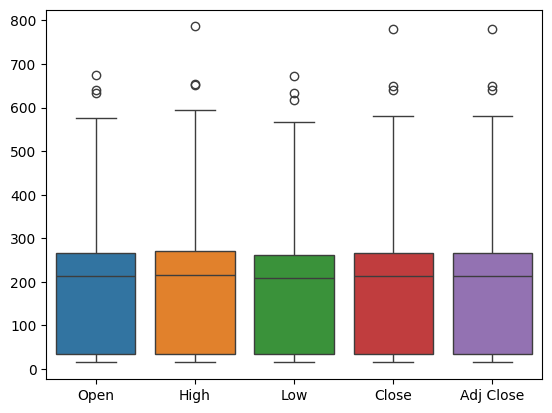

In [381]:
sns.boxplot(data=df.drop(['Volume'],axis=1))

Checking outliers in Volume column

<Axes: ylabel='Volume'>

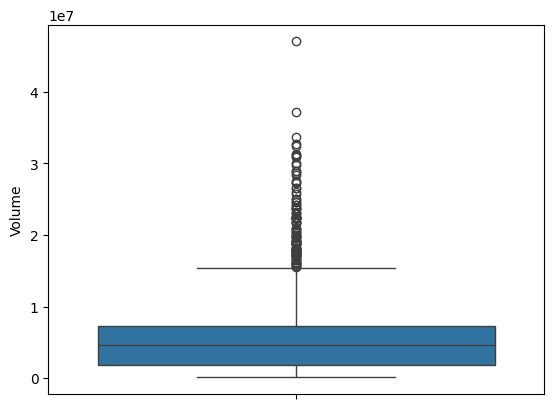

In [382]:
sns.boxplot(data=df['Volume'])

##### **Removing Outliers**

Using Interquartile Range

In [383]:
I3=df['Volume'].quantile(0.75)
I1=df['Volume'].quantile(0.25)
Q=I3-I1


Removing Outliers Rows as Per Volume Attribute

In [384]:
df=df[(df['Volume']>=I1- 1.5*Q) & (df['Volume']<=I3 +1.5*Q)]

<Axes: ylabel='Volume'>

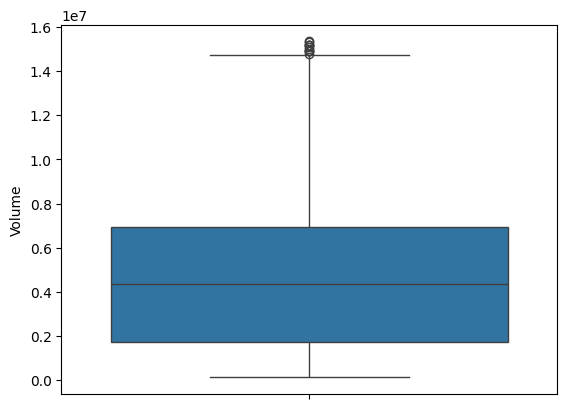

In [385]:
sns.boxplot(data=df['Volume'])

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2306 entries, 2010-07-01 to 2020-01-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2306 non-null   float64
 1   High       2306 non-null   float64
 2   Low        2306 non-null   float64
 3   Close      2306 non-null   float64
 4   Adj Close  2306 non-null   float64
 5   Volume     2306 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 126.1 KB


Creating Dependent and Independent Records Seperately

In [387]:
X=df.drop(['Adj Close'],axis=1)
y=df['Adj Close']

Splitting the Data as per Training and Testing

In [388]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,shuffle=False)

Standardizing The Records for better Accuracy

In [389]:
from sklearn.preprocessing import MinMaxScaler

# scale X
modelx = MinMaxScaler()
X_train_scaled = modelx.fit_transform(X_train)
X_test_scaled  = modelx.transform(X_test)

# scale y
modely = MinMaxScaler()
y_train_scaled = modely.fit_transform(y_train.to_frame())
y_test_scaled  = modely.transform(y_test.to_frame())

In [390]:
y_test.max() #>1#Because of min and max are taken from training data ,we did only transform not fit_transform 

np.float64(566.900024)

Selecting How Much Previous Should be Selected

In [391]:
window_size = 50

Splitting The Data as per the Window Size

In [392]:

def create_sequences(X, y, window_size):
    X_seq, y_seq = [],[]

    for i in range(len(X) - window_size):
        X_seq.append(X[i:i + window_size])
        y_seq.append(y[i + window_size])

    return np.array(X_seq), np.array(y_seq)


X_train_seq, y_train_seq = create_sequences(
    X_train_scaled,
    y_train_scaled,
    window_size
)

X_test_seq, y_test_seq = create_sequences(
    X_test_scaled,
    y_test_scaled,
    window_size
)



In [393]:
print(X_train_seq.shape)
print(y_train_seq.shape)

(1679, 50, 5)
(1679, 1)


### **Data Visualization**

Overall Data How stock Prices are Changing With Data

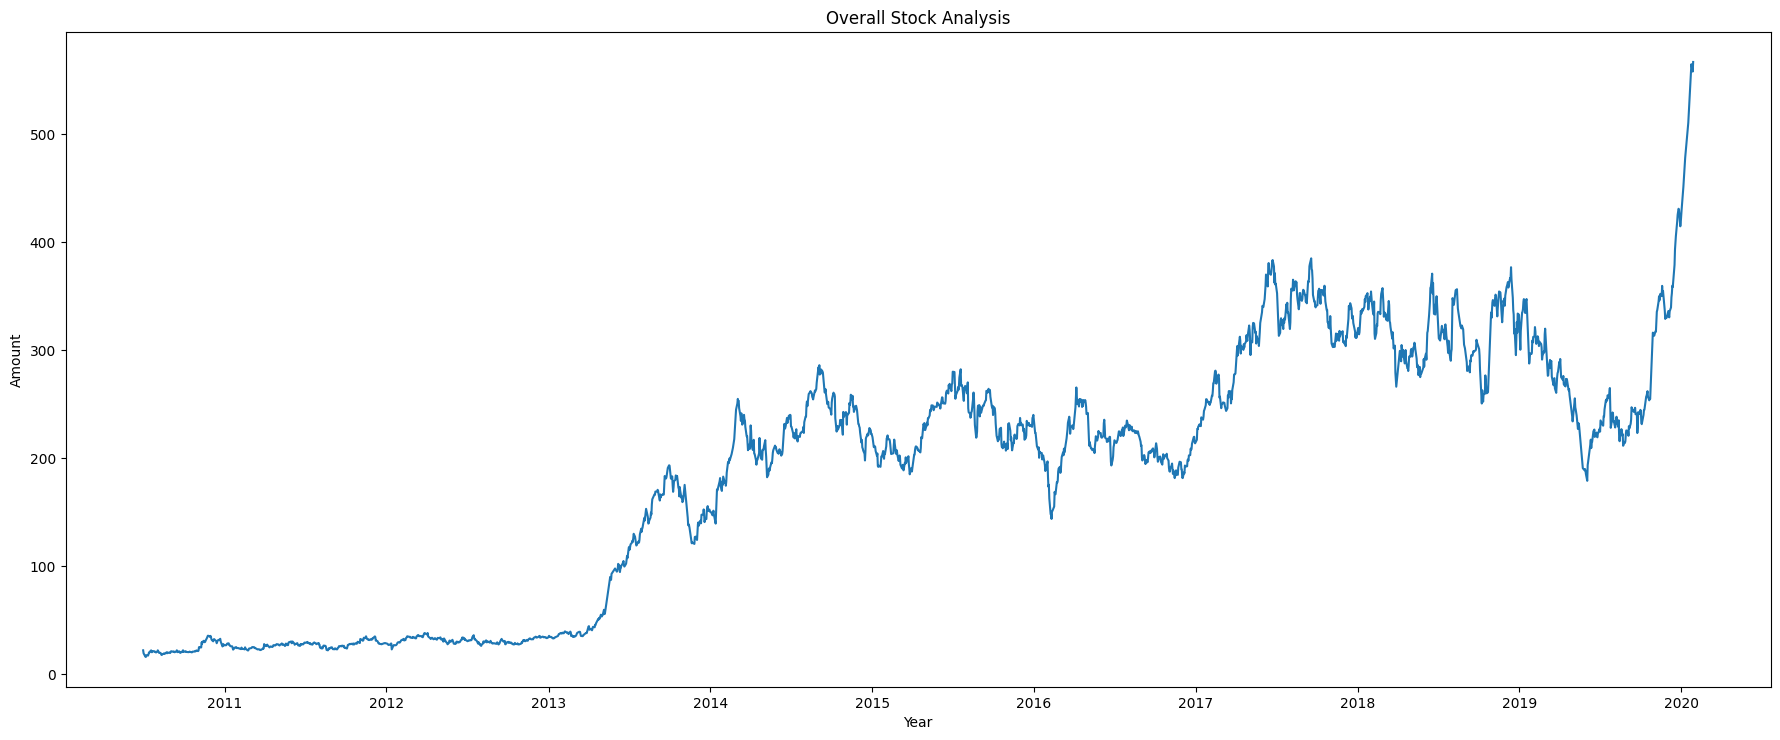

In [394]:
plt.figure(figsize=(22,8.5))
sns.lineplot(df['Close'])
plt.title("Overall Stock Analysis")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.show()

Opening Stock and Closing Stock

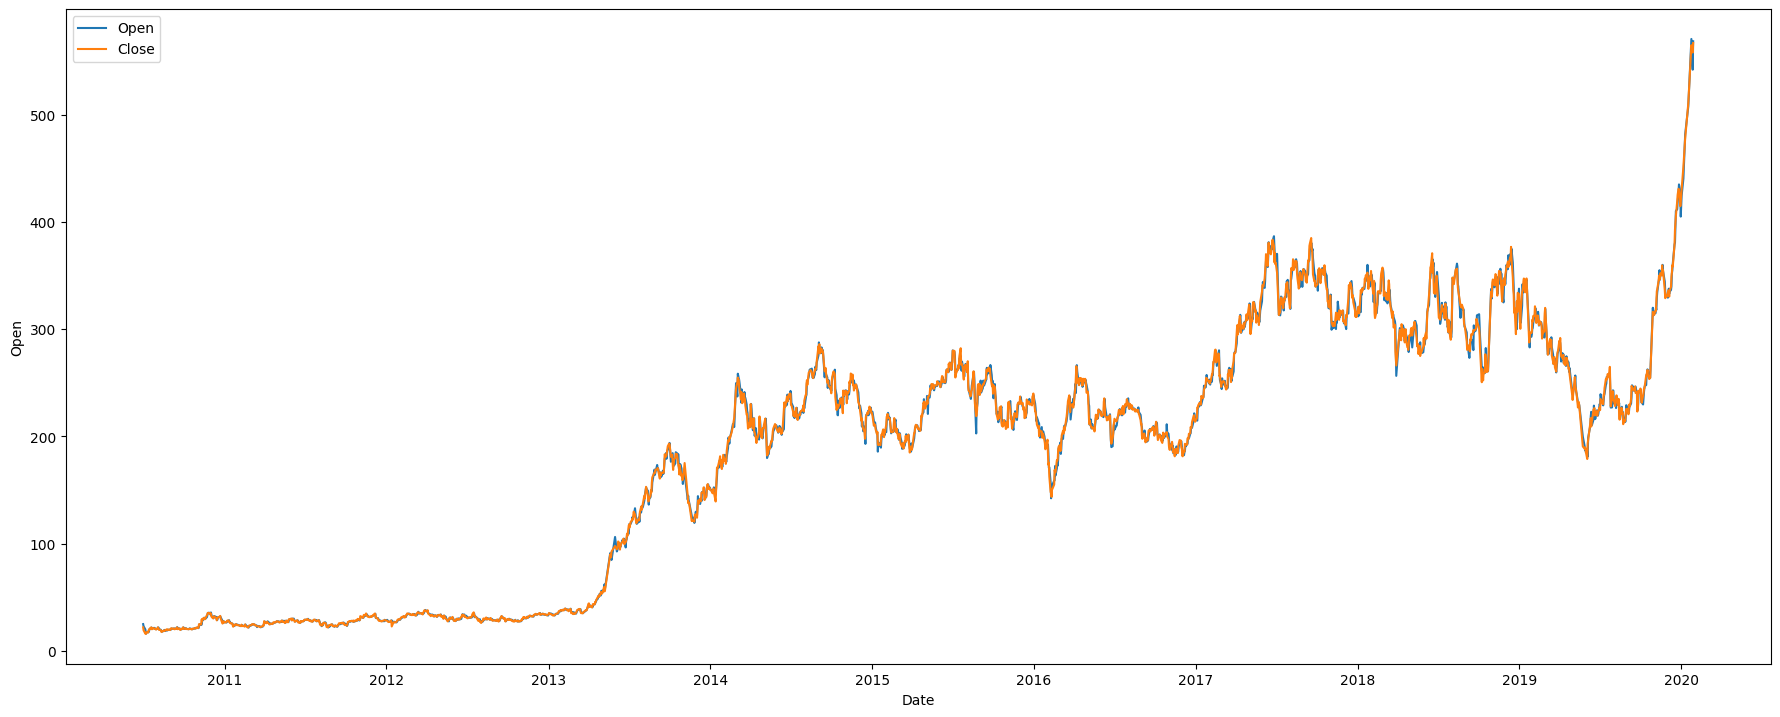

In [395]:
plt.figure(figsize=(22,8.5))
sns.lineplot(df['Open'],label='Open')
sns.lineplot(df['Close'],label='Close')
plt.show()

<Axes: xlabel='Date', ylabel='Volume'>

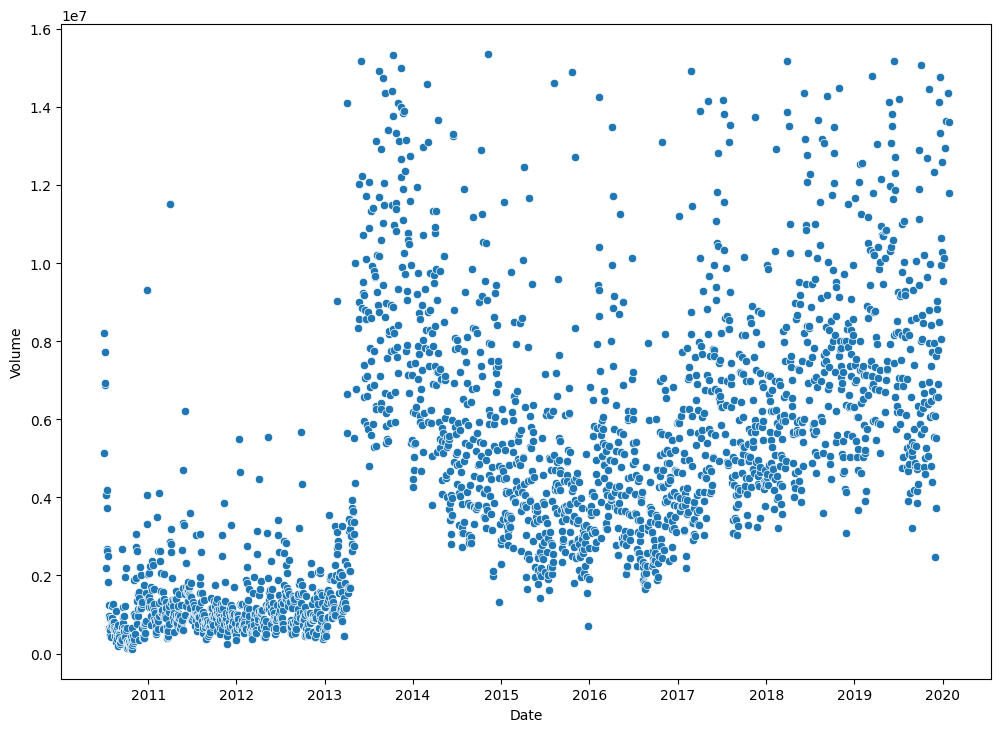

In [396]:
plt.figure(figsize=(12,8.5))
sns.scatterplot(df['Volume'])

In [397]:
corr=df.corr()

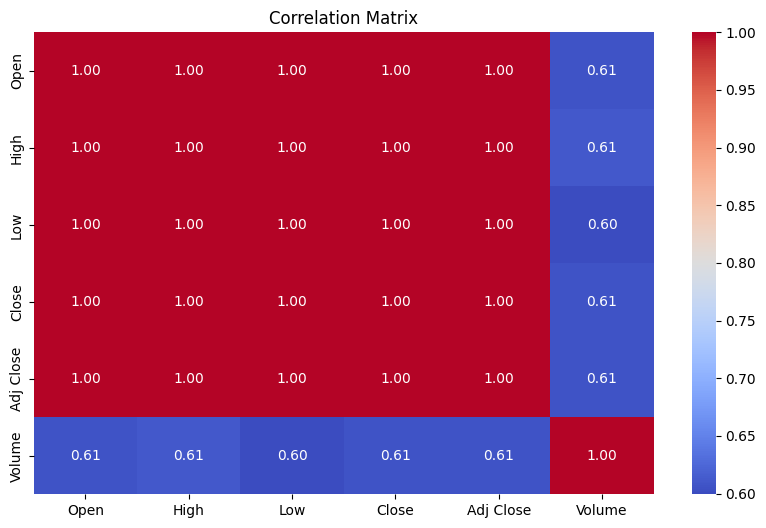

In [398]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


### **Model Building**

### **RNN - Recurrent Neural Network**

RNN is a neural network designed to handle sequential data by using a hidden state that carries information from previous time steps.

import Required Libraries

In [399]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input

In [400]:

rnn_model = Sequential([
    Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    SimpleRNN(units=50, activation='tanh'),
    Dense(1)
])

rnn_model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

In [401]:
rnn_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_14 (SimpleRNN)       │ (None, 50)             │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,851 (11.14 KB)

 Trainable params: 2,851 (11.14 KB)

 Non-trainable params: 0 (0.00 B)

 RNN:

Works for short sequences

Fails for long sequences

In [402]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_rnn = rnn_model.fit(
    X_train_seq,
    y_train_seq,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_seq, y_test_seq),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0494 - val_loss: 0.0120
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0024 - val_loss: 0.0057
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - val_loss: 0.0041
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010 - val_loss: 0.0042
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.2674e-04 - val_loss: 0.0031
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.4940e-04 - val_loss: 0.0023
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.6537e-04 - val_loss: 0.0021
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.0144e-04 - val_loss: 0.0020
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.5798e-04 - val_loss: 0.0019
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.6688e-04 - val_loss: 0.0018
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9419e-04 - val_loss: 0.0020
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━

In [403]:
# from tensorflow.keras.layers import Dropout

# SimpleRNN(50, activation='tanh'),
# Dropout(0.2)


In [404]:
y_pred_rnn = rnn_model.predict(X_test_seq)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [405]:
# predictions (scaled → real)
y_pred_rnn = modely.inverse_transform(y_pred_rnn)

# actual values (scaled → real)
y_test_rnn = modely.inverse_transform(y_test_seq)

In [406]:
from sklearn.metrics import mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test_rnn, y_pred_rnn))
mae = mean_absolute_error(y_test_rnn, y_pred_rnn)

print("RMSE:", rmse)
print("MAE :", mae)


RMSE: 11.701559336441898
MAE : 7.721240591213163


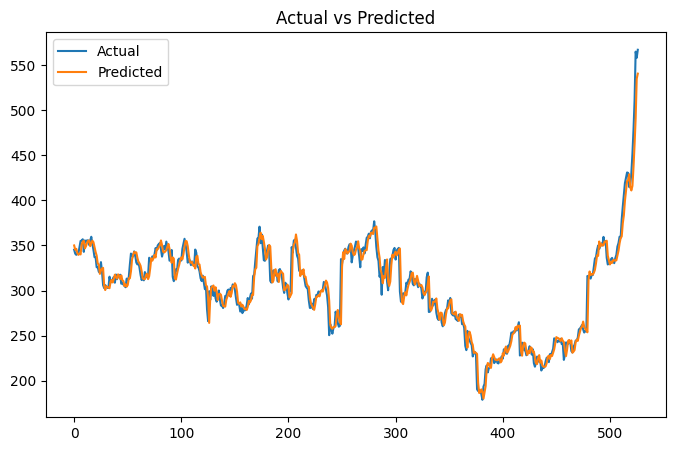

In [407]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(y_test_rnn, label='Actual')
plt.plot(y_pred_rnn, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted")
plt.show()


In [ ]:
# # save model
# rnn_model.save("rnn_model.h5")

# # save scaler
# import pickle
# with open("scaler_y.pkl", "wb") as f:
#     pickle.dump(modely, f)

# # save test data
# import numpy as np
# np.save("X_test_seq.npy", X_test_seq)
# np.save("y_test_seq.npy", y_test_seq)




## **LSTM- Long Short-Term Memory**

import Libraries

In [409]:
from tensorflow.keras.layers import LSTM

Model Generation

In [410]:
lstm_model = Sequential([
    Input(shape=(window_size, 5)),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])

Compilation

In [411]:
lstm_model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)


Training

In [412]:
history = lstm_model.fit(
    X_train_seq,
    y_train_seq,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0100 - val_loss: 0.0044
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0024 - val_loss: 0.0044
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0019 - val_loss: 0.0055
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0019 - val_loss: 0.0037
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0018 - val_loss: 0.0040
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0016 - val_loss: 0.0048
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0017 - val_loss: 0.0055
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0015 - val_loss: 0.0028
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0015 - val_loss: 0.0037
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0

Model Testing

In [413]:
y_pred_lstm = lstm_model.predict(X_test_seq)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


Inverse Transformation

In [414]:
# predictions (scaled → real)
y_pred_lstm = modely.inverse_transform(y_pred_lstm)

# actual values (scaled → real)
y_test_lstm = modely.inverse_transform(y_test_seq)


Model Evalvation

In [415]:
from sklearn.metrics import mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test_lstm, y_pred_lstm))
mae = mean_absolute_error(y_test_lstm, y_pred_lstm)

print("RMSE:", rmse)
print("MAE :", mae)


RMSE: 21.116217301407755
MAE : 15.427907124772076


##### Actual vs Predicted Graph

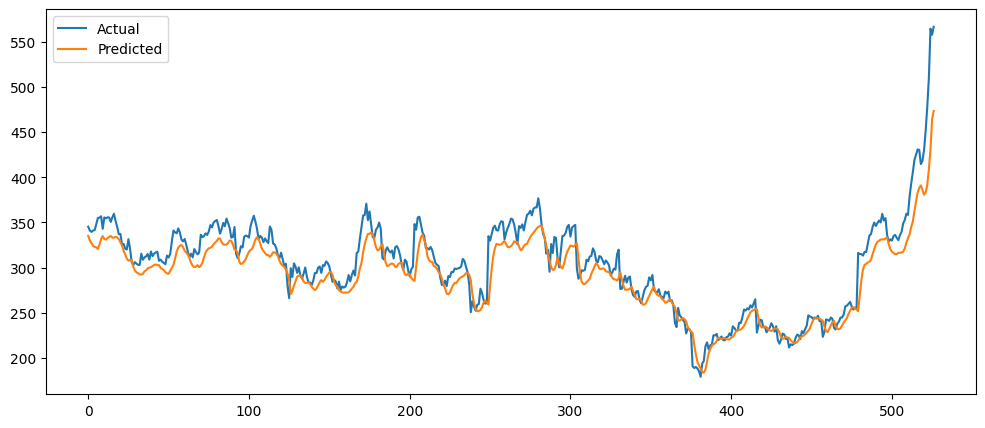

In [416]:
plt.figure(figsize=(12,5))
plt.plot(y_test_lstm, label="Actual")
plt.plot(y_pred_lstm, label="Predicted")
plt.legend()
plt.show()


Streamlit Creation

In [ ]:
# import joblib

# # save scalers
# joblib.dump(modelx, "x_scaler.pkl")
# joblib.dump(modely, "y_scaler.pkl")

# # save model
# lstm_model.save("lstm_model.h5")

# # save metadata
# joblib.dump({
#     "window_size": window_size,
#     "features": X.columns.tolist()
# }, "meta.pkl")


['meta.pkl']

### Conclusion

- Historical stock market data was successfully analyzed and prepared using time-series preprocessing techniques and a fixed window approach.
>
- SimpleRNN and LSTM models were implemented to predict the next trading day’s closing stock price based on past price patterns.
>
- Recursive forecasting was used to simulate short-term future price movements over different time horizons such as days, months, and years.
>
- Interactive Streamlit applications were developed to visualize predictions, evaluate model behavior, and estimate potential profit or loss.
>
- The project highlights both the usefulness of deep learning models in financial forecasting and the limitations of long-term predictions in volatile stock markets.
